In [46]:
from cProfile import label
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sympy import *
import scipy as sp
import sys
sys.path.append('..')

from libka import *

In [47]:
I_ZASILACZ = 2.00 * 10**(-3) # A
NIEP_I_ZAS = typeB(0.01/1000,0)
U_NIESYMETRYZACJI = -0.63 #mV dla Icewki =0
PODZIALKA_HALLA = 0.1 # A
d = 0.3 * 10**(-6) # m
e = 1.602 * 10**(-19) # C

# check unit of sigma
SIGMA = 30516.43192488263 # 1/(Ohm*m) 

LENGTH = 7.8 * 10**(-3) # m
AA = 4 * 10**(-3) # m
DD = 0.3 * 10**(-6) # m

In [48]:
df = pd.read_csv("in/dataI2.csv", names = ["I", "U mV"], header = 0)


In [49]:
df["U"] = df["U mV"] * 10**(-3) # V
df["B"] = 0.00673 + 0.18548 * df["I"] + 0.00217 * df["I"]**2 - 0.00318 * df["I"]**3 + 2.00009 * 10**(-4) * df["I"]**4

df["uI"] = typeB(PODZIALKA_HALLA, PODZIALKA_HALLA/2)
df["uU"] = 0.03/100*df["U"] + 0.01 * 10**(-3) # V
df["uB"] = (0.18548 + 2 * 0.00217 * df["I"] - 3 * 0.00318 * df["I"]**2 + 4* 2.00009 * 10**(-4) * df["I"]**3) * df["uI"]
df

,I,U mV,U,B,uI,uU,uB
0,0.0,-0.63,-0.00063,0.006730,0.06455,0.000010,0.011973
1,0.5,3.77,0.00377,0.099628,0.06455,0.000011,0.011965
2,1.0,8.48,0.00848,0.191400,0.06455,0.000013,0.011689
3,1.5,12.80,0.01280,0.280113,0.06455,0.000014,0.011182
4,2.0,17.18,0.01718,0.364130,0.06455,0.000015,0.010483
5,2.5,21.34,0.02134,0.442118,0.06455,0.000016,0.009631
6,3.0,25.08,0.02508,0.513041,0.06455,0.000018,0.008665
7,3.5,28.21,0.02821,0.576164,0.06455,0.000018,0.007624
8,4.0,30.78,0.03078,0.631052,0.06455,0.000019,0.006545
9,4.5,32.75,0.03275,0.677571,0.06455,0.000020,0.005469


In [50]:
df2 = pd.read_csv('in/resistance.csv', names = ["II", "Up", "Uw"], header = 0)
new_df = pd.concat([df, df2], axis = 1)
new_df.pop("II")

new_df["uUp"] = 0.03/100*new_df["Up"] + 0.01 * 10**(-3) # V
new_df["uUw"] = 0.03/100*new_df["Uw"] + 0.01 * 10**(-3) # V

new_df["Rp"] = new_df["Up"] / I_ZASILACZ
new_df["uRp"] = np.sqrt((1/I_ZASILACZ * new_df["uUp"])**2 + (new_df["Up"]/I_ZASILACZ/I_ZASILACZ*NIEP_I_ZAS)**2)
new_df["Rw"] = new_df["Uw"] / I_ZASILACZ
new_df["uRw"] = np.sqrt((1/I_ZASILACZ * new_df["uUw"])**2 + (new_df["Uw"]/I_ZASILACZ/I_ZASILACZ*NIEP_I_ZAS)**2)

new_df["sig"] = 1 / new_df["Rp"] * LENGTH / AA / DD

sig0 = new_df["sig"][0]
Ux0 = new_df["Up"][0]

new_df

,I,U mV,U,B,uI,uU,uB,Up,Uw,uUp,uUw,Rp,uRp,Rw,uRw,sig
0,0.0,-0.63,-0.00063,0.006730,0.06455,0.000010,0.011973,0.4260,0.2006,0.000138,0.00007,213.00,0.618726,100.30,0.291660,30516.431925
1,0.5,3.77,0.00377,0.099628,0.06455,0.000011,0.011965,0.4308,0.2007,0.000139,0.00007,215.40,0.625692,100.35,0.291805,30176.415970
2,1.0,8.48,0.00848,0.191400,0.06455,0.000013,0.011689,0.4322,0.2007,0.000140,0.00007,216.10,0.627723,100.35,0.291805,30078.667284
3,1.5,12.80,0.01280,0.280113,0.06455,0.000014,0.011182,0.4344,0.2007,0.000140,0.00007,217.20,0.630916,100.35,0.291805,29926.335175
4,2.0,17.18,0.01718,0.364130,0.06455,0.000015,0.010483,0.4376,0.2007,0.000141,0.00007,218.80,0.635559,100.35,0.291805,29707.495430
5,2.5,21.34,0.02134,0.442118,0.06455,0.000016,0.009631,0.4411,0.2008,0.000142,0.00007,220.55,0.640638,100.40,0.291950,29471.775108
6,3.0,25.08,0.02508,0.513041,0.06455,0.000018,0.008665,0.4449,0.2007,0.000143,0.00007,222.45,0.646152,100.35,0.291805,29220.049449
7,3.5,28.21,0.02821,0.576164,0.06455,0.000018,0.007624,0.4483,0.2007,0.000144,0.00007,224.15,0.651086,100.35,0.291805,28998.438546
8,4.0,30.78,0.03078,0.631052,0.06455,0.000019,0.006545,0.4513,0.2006,0.000145,0.00007,225.65,0.655439,100.30,0.291660,28805.672502
9,4.5,32.75,0.03275,0.677571,0.06455,0.000020,0.005469,0.4538,0.2006,0.000146,0.00007,226.90,0.659067,100.30,0.291660,28646.981049


In [51]:
new_df.drop(new_df.index[0], inplace = True)
new_df.reset_index(drop = True, inplace = True)

In [52]:
new_df['dSig'] = sig0 - new_df['sig']

new_df['dSig/sig'] = new_df['dSig']/new_df['sig']
new_df["(Ux-U)/Ux"] = (new_df["Up"] - Ux0) / new_df["Up"]

# ktora wartosc wybrac?

new_df

,I,U mV,U,B,uI,uU,uB,Up,Uw,uUp,uUw,Rp,uRp,Rw,uRw,sig,dSig,dSig/sig,(Ux-U)/Ux
0,0.5,3.77,0.00377,0.099628,0.06455,0.000011,0.011965,0.4308,0.2007,0.000139,0.00007,215.40,0.625692,100.35,0.291805,30176.415970,340.015955,0.011268,0.011142
1,1.0,8.48,0.00848,0.191400,0.06455,0.000013,0.011689,0.4322,0.2007,0.000140,0.00007,216.10,0.627723,100.35,0.291805,30078.667284,437.764641,0.014554,0.014345
2,1.5,12.80,0.01280,0.280113,0.06455,0.000014,0.011182,0.4344,0.2007,0.000140,0.00007,217.20,0.630916,100.35,0.291805,29926.335175,590.096750,0.019718,0.019337
3,2.0,17.18,0.01718,0.364130,0.06455,0.000015,0.010483,0.4376,0.2007,0.000141,0.00007,218.80,0.635559,100.35,0.291805,29707.495430,808.936495,0.027230,0.026508
4,2.5,21.34,0.02134,0.442118,0.06455,0.000016,0.009631,0.4411,0.2008,0.000142,0.00007,220.55,0.640638,100.40,0.291950,29471.775108,1044.656817,0.035446,0.034233
5,3.0,25.08,0.02508,0.513041,0.06455,0.000018,0.008665,0.4449,0.2007,0.000143,0.00007,222.45,0.646152,100.35,0.291805,29220.049449,1296.382476,0.044366,0.042481
6,3.5,28.21,0.02821,0.576164,0.06455,0.000018,0.007624,0.4483,0.2007,0.000144,0.00007,224.15,0.651086,100.35,0.291805,28998.438546,1517.993379,0.052347,0.049743
7,4.0,30.78,0.03078,0.631052,0.06455,0.000019,0.006545,0.4513,0.2006,0.000145,0.00007,225.65,0.655439,100.30,0.291660,28805.672502,1710.759423,0.059390,0.056060
8,4.5,32.75,0.03275,0.677571,0.06455,0.000020,0.005469,0.4538,0.2006,0.000146,0.00007,226.90,0.659067,100.30,0.291660,28646.981049,1869.450876,0.065258,0.061260
9,5.0,34.61,0.03461,0.715886,0.06455,0.000020,0.004434,0.4561,0.2006,0.000147,0.00007,228.05,0.662405,100.30,0.291660,28502.521377,2013.910548,0.070657,0.065994


In [53]:
a, b, ua, ub, chi2 = least_squares(df["U"], df["B"], df["uB"], 0, len(df.index)-1)

print("a = ", a, ", ua = ", ua)
print("b = ", b, ", ub = ", ub)
print("chi2 = ", chi2)

a =  20.099335332868883 , ua =  0.20610599599100374
b =  0.01782303244148715 , ub =  0.006323591846249882
chi2 =  76.32251730903977


In [54]:
Rh = d/a/I_ZASILACZ
uRh = d/I_ZASILACZ/a/a * ua

print("Rh = ", Rh, ", uRh = ", uRh)

Rh =  7.462933351567189e-06 , uRh =  7.652767049086724e-08


In [55]:
# idk if i should take r or not, look at page nr 4
# przyjmujemy tylko jeden rodzaj nosnikow

n = 1/Rh/e
un = 1/e/Rh/Rh * uRh

print("n = ", n, ", un = ", un)

mu = SIGMA/n/e
umu = SIGMA/e /n/n * un

print("mu = ", mu, ", umu = ", umu)

n =  8.364267720711146e+23 , un =  8.577028547274398e+21
mu =  0.22774209758303626 , umu =  0.0023353514469043996


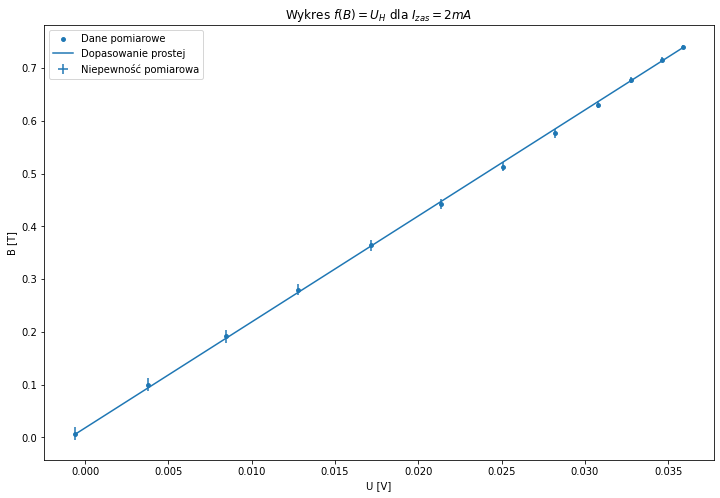

In [58]:
fig, ax = plt.subplots(figsize = (12, 8)) # add scienitfic notation for x axe
ax.scatter(df["U"], df["B"], label = "Dane pomiarowe", s=15)
ax.plot(df["U"], a*df["U"]+b, label = "Dopasowanie prostej")
ax.errorbar(df["U"], df["B"], xerr = df["uU"], yerr = df["uB"], fmt = "none", label = "Niepewność pomiarowa")
ax.set_xlabel("U [V]")
ax.set_ylabel("B [T]")
ax.set_title(r"Wykres $f(B)=U_H$ dla $I_{zas}=2mA$")
ax.legend(loc=2)

fig.savefig("out/bu2.jpg", dpi = 800)
plt.show()